<a href="https://colab.research.google.com/github/bbastos1310/projeto_mod5/blob/master/projeto_modulo5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de Machine Learning

## Lista de dicas/técnicas aprendidas

1. Tratamento de dados ausentes
2. Separação entre features (X) e target(y)
3. Seleção de features a partir da correlação
4. Definição de classe (Label encoder)
5. Balanceamento do target
6. Encoder de features
7. Standard Scaler
8. Transformação de coluna
9. Pipeline
10. Split de dados de treino e de teste com stratify
11. Modelo de classificação (Árvore de decisão)
12. Cross validation (cv)
13. Curva de validação
14. Curva de aprendizado
15. Núcleos utilizados para o processamento (n_jobs)
16. Random search
17. Grid search
18. F1 score (Precision e recall)
19. Verificação dos parâmetros do teste com melhor pontuação
20. Uso do random state
21. Tratamento de dados para a árvore de decisão
22. Critérios de pureza (índice de Gini)
23. Pairplot para verificação da divisão entre as features e o target
24. Profundidade da árvore
25. Acesso ao resultado do cross validation do random search
26. Plot da árvore de decisão
27. Modelo de classificação (Regressão logística)
28. Penalidade L2
29. Variação do parâmetro C para a curva de validação

## Análise dos dados

### Importando Biblioteca

In [356]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno
from sklearn.preprocessing import LabelEncoder
import plotly.express as px

### Aquisição de dados

In [357]:
url = 'https://raw.githubusercontent.com/bbastos1310/projeto_mod5/master/kidney_disease.csv'
df_kidney = pd.read_csv(url)

In [358]:
df_kidney.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [359]:
df_kidney.tail()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd
399,399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,53,6800,6.1,no,no,no,good,no,no,notckd


### Descrição das 26 colunas do Dataset

id: número de identificação do paciente

age: idade do paciente em anos

bp: pressão arterial do paciente em mm/Hg

sg: gravidade específica da urina do paciente (1.005, 1.010, 1.015, 1.020, 1.025)

al: quantidade de albumina na urina do paciente (0, 1, 2, 3, 4, 5)

su: quantidade de açúcar na urina do paciente (0, 1, 2, 3, 4, 5)

rbc: presença de glóbulos vermelhos na urina do paciente (normal, anormal)

pc: presença de células brancas na urina do paciente (normal, anormal)

pcc: presença de cilindros patológicos na urina do paciente (normal, anormal)

ba: presença de bactérias na urina do paciente (presente, ausente)

bgr: nível de glicose no sangue do paciente aleatório em mgs/dl

bu: nível de ureia no sangue do paciente em mgs/dl

sc: nível de creatinina sérica no sangue do paciente em mgs/dl

sod: nível de sódio sérico no sangue do paciente em mEq/L

pot: nível de potássio sérico no sangue do paciente em mEq/L

hemo: nível de hemoglobina no sangue do paciente em gms

pcv: volume de células vermelhas do sangue do paciente em %

wc: contagem de células brancas do sangue do paciente em células/cumm

rc: contagem de células vermelhas do sangue do paciente em milhões/cumm

htn: indica se o paciente tem hipertensão (sim, não)

dm: indica se o paciente tem diabetes (sim, não)

cad: indica se o paciente tem doença arterial coronariana (sim, não)

appet: apetite do paciente (bom, ruim)

pe: edema periférico (sim, não)

ane: anemia (sim, não)

classification: indica se o paciente tem doença renal crônica (ckd) ou não (notckd).

Para a apresentação achamos interessante deixar os nomes das colunas em Português

In [360]:
df_kidney.columns = ['id', 'idade', 'pressao_sang', 'gravidade_espec', 'albumina', 'acucar', 'glob_vermelhos', 'cel_pus',
              'aglomerados_cel_pus', 'bacteria', 'glicose_sang_aleatoria', 'ureia_sang', 'creatinina_serica', 'sodio',
              'potassio', 'hemoglobina', 'volume_globular', 'cont_glob_brancos', 'cont_glob_vermelhos',
              'hypertensao', 'diabetes_mellitus', 'doenca_arterial_coronariana', 'apetite', 'edema_pedal',
              'anemia', 'classe']

In [361]:
df_kidney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           400 non-null    int64  
 1   idade                        391 non-null    float64
 2   pressao_sang                 388 non-null    float64
 3   gravidade_espec              353 non-null    float64
 4   albumina                     354 non-null    float64
 5   acucar                       351 non-null    float64
 6   glob_vermelhos               248 non-null    object 
 7   cel_pus                      335 non-null    object 
 8   aglomerados_cel_pus          396 non-null    object 
 9   bacteria                     396 non-null    object 
 10  glicose_sang_aleatoria       356 non-null    float64
 11  ureia_sang                   381 non-null    float64
 12  creatinina_serica            383 non-null    float64
 13  sodio               

### Verificação dos dados e suas variações

Dados do tipo "object"

In [362]:
df_kidney_obj = df_kidney.select_dtypes(object)
for col in df_kidney_obj.columns:
    print(f'Valores da coluna {col}: {df_kidney_obj[col].unique()}\n')

Valores da coluna glob_vermelhos: [nan 'normal' 'abnormal']

Valores da coluna cel_pus: ['normal' 'abnormal' nan]

Valores da coluna aglomerados_cel_pus: ['notpresent' 'present' nan]

Valores da coluna bacteria: ['notpresent' 'present' nan]

Valores da coluna volume_globular: ['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '\t?' '52' '14' '22' '18' '42' '17' '46' '23'
 '19' '25' '41' '26' '15' '21' '43' '20' '\t43' '47' '9' '49' '50' '53'
 '51' '54']

Valores da coluna cont_glob_brancos: ['7800' '6000' '7500' '6700' '7300' nan '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9800' '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300'
 '7200' '7700' '14600' '6300' '\t6200' '7100' '11800' '9400' '5500' '5800'
 '13200' '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800'
 '6500' '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300'
 '12400' '\t8400' '105

Nota-se que alguns dados apresentam falhas na formatação, abaixo é feita a correção

In [363]:
df_kidney['volume_globular'] = df_kidney['volume_globular'].replace(to_replace = {'\t?': np.nan, '\t43': 43}).astype(float)
df_kidney['cont_glob_brancos'] = df_kidney['cont_glob_brancos'].replace(to_replace = {'\t6200': 6200, '\t?': np.nan}).astype(float)
df_kidney['cont_glob_vermelhos'] = df_kidney['cont_glob_vermelhos'].replace(to_replace = {'\t?': np.nan}).astype(float)
df_kidney['diabetes_mellitus'] = df_kidney['diabetes_mellitus'].replace(to_replace = {' yes': 'yes', '\tno': 'no', '\tyes': 'yes'})
df_kidney['doenca_arterial_coronariana'] = df_kidney['doenca_arterial_coronariana'].replace(to_replace = {'\tno': 'no'})
df_kidney['classe'] = df_kidney['classe'].replace(to_replace = {'ckd\t': 'ckd'})

Verificação da correção

In [364]:
df_kidney_obj = df_kidney.select_dtypes(object)
for col in df_kidney_obj.columns:
    print(f'Valores da coluna {col}: {df_kidney_obj[col].unique()}\n')

Valores da coluna glob_vermelhos: [nan 'normal' 'abnormal']

Valores da coluna cel_pus: ['normal' 'abnormal' nan]

Valores da coluna aglomerados_cel_pus: ['notpresent' 'present' nan]

Valores da coluna bacteria: ['notpresent' 'present' nan]

Valores da coluna hypertensao: ['yes' 'no' nan]

Valores da coluna diabetes_mellitus: ['yes' 'no' nan]

Valores da coluna doenca_arterial_coronariana: ['no' 'yes' nan]

Valores da coluna apetite: ['good' 'poor' nan]

Valores da coluna edema_pedal: ['no' 'yes' nan]

Valores da coluna anemia: ['no' 'yes' nan]

Valores da coluna classe: ['ckd' 'notckd']



In [365]:
df_kidney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           400 non-null    int64  
 1   idade                        391 non-null    float64
 2   pressao_sang                 388 non-null    float64
 3   gravidade_espec              353 non-null    float64
 4   albumina                     354 non-null    float64
 5   acucar                       351 non-null    float64
 6   glob_vermelhos               248 non-null    object 
 7   cel_pus                      335 non-null    object 
 8   aglomerados_cel_pus          396 non-null    object 
 9   bacteria                     396 non-null    object 
 10  glicose_sang_aleatoria       356 non-null    float64
 11  ureia_sang                   381 non-null    float64
 12  creatinina_serica            383 non-null    float64
 13  sodio               

### Tratamento de dados ausentes

Porcentagem de dados ausentes de cada coluna

In [366]:
df_kidney.isnull().sum().sort_values(ascending = False)/len(df_kidney)

glob_vermelhos                 0.3800
cont_glob_vermelhos            0.3275
cont_glob_brancos              0.2650
potassio                       0.2200
sodio                          0.2175
volume_globular                0.1775
cel_pus                        0.1625
hemoglobina                    0.1300
acucar                         0.1225
gravidade_espec                0.1175
albumina                       0.1150
glicose_sang_aleatoria         0.1100
ureia_sang                     0.0475
creatinina_serica              0.0425
pressao_sang                   0.0300
idade                          0.0225
bacteria                       0.0100
aglomerados_cel_pus            0.0100
hypertensao                    0.0050
diabetes_mellitus              0.0050
doenca_arterial_coronariana    0.0050
anemia                         0.0025
apetite                        0.0025
edema_pedal                    0.0025
id                             0.0000
classe                         0.0000
dtype: float

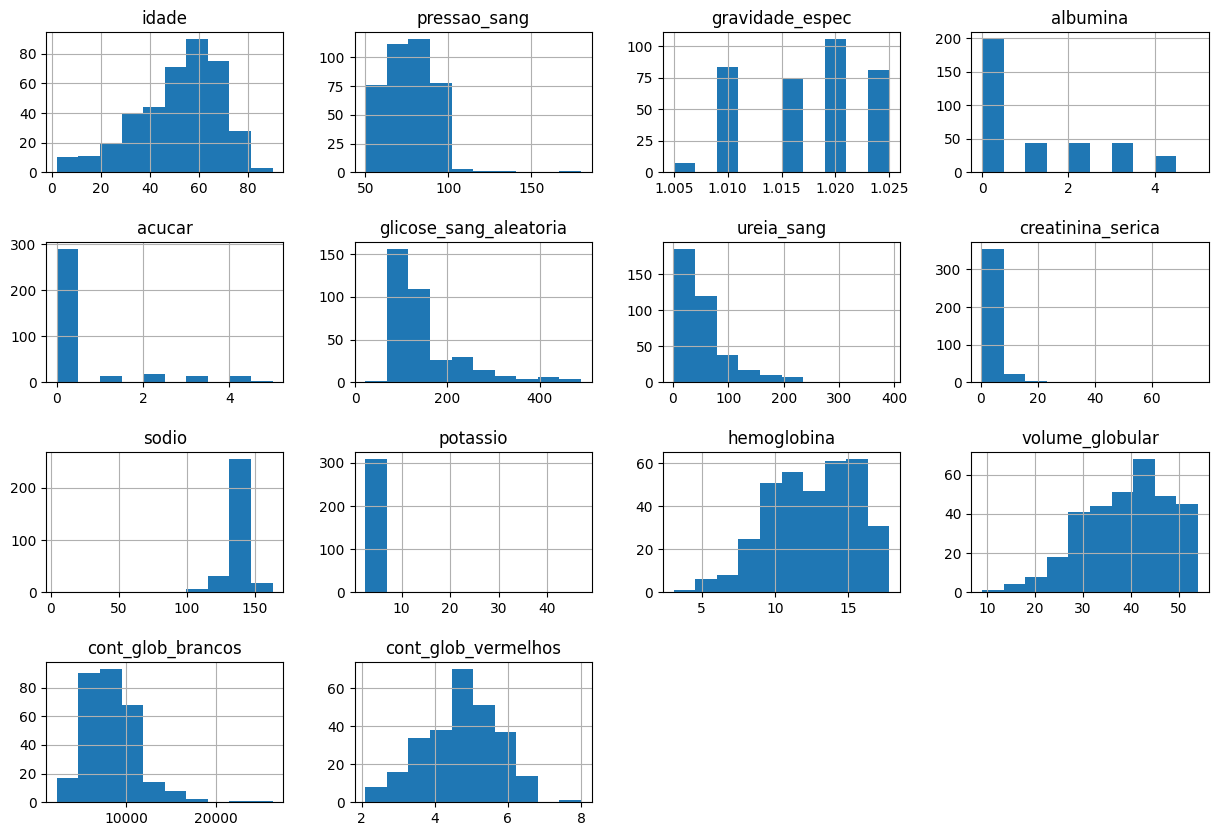

In [367]:
#Veificando a distribuição dos valores para cada uma das colunas
df_kidney.drop(['id'], axis = 1).hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

Matriz de correlação entre as colunas numéricas

<ipython-input-368-16b595269d0a>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Text(0.5, 1.0, 'Matriz de correlação')

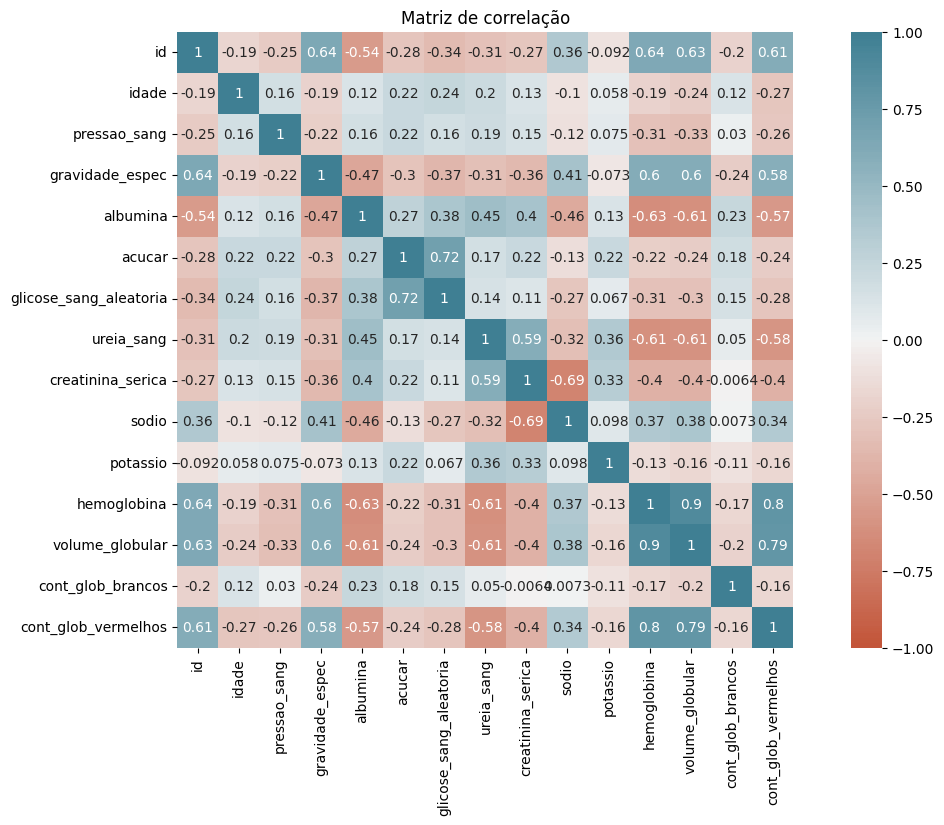

In [368]:
plt.figure(figsize = (15,8))
sns.heatmap(df_kidney.corr(), annot=True, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True)
plt.title('Matriz de correlação')

Verificação das linhas com dados ausentes

<Axes: >

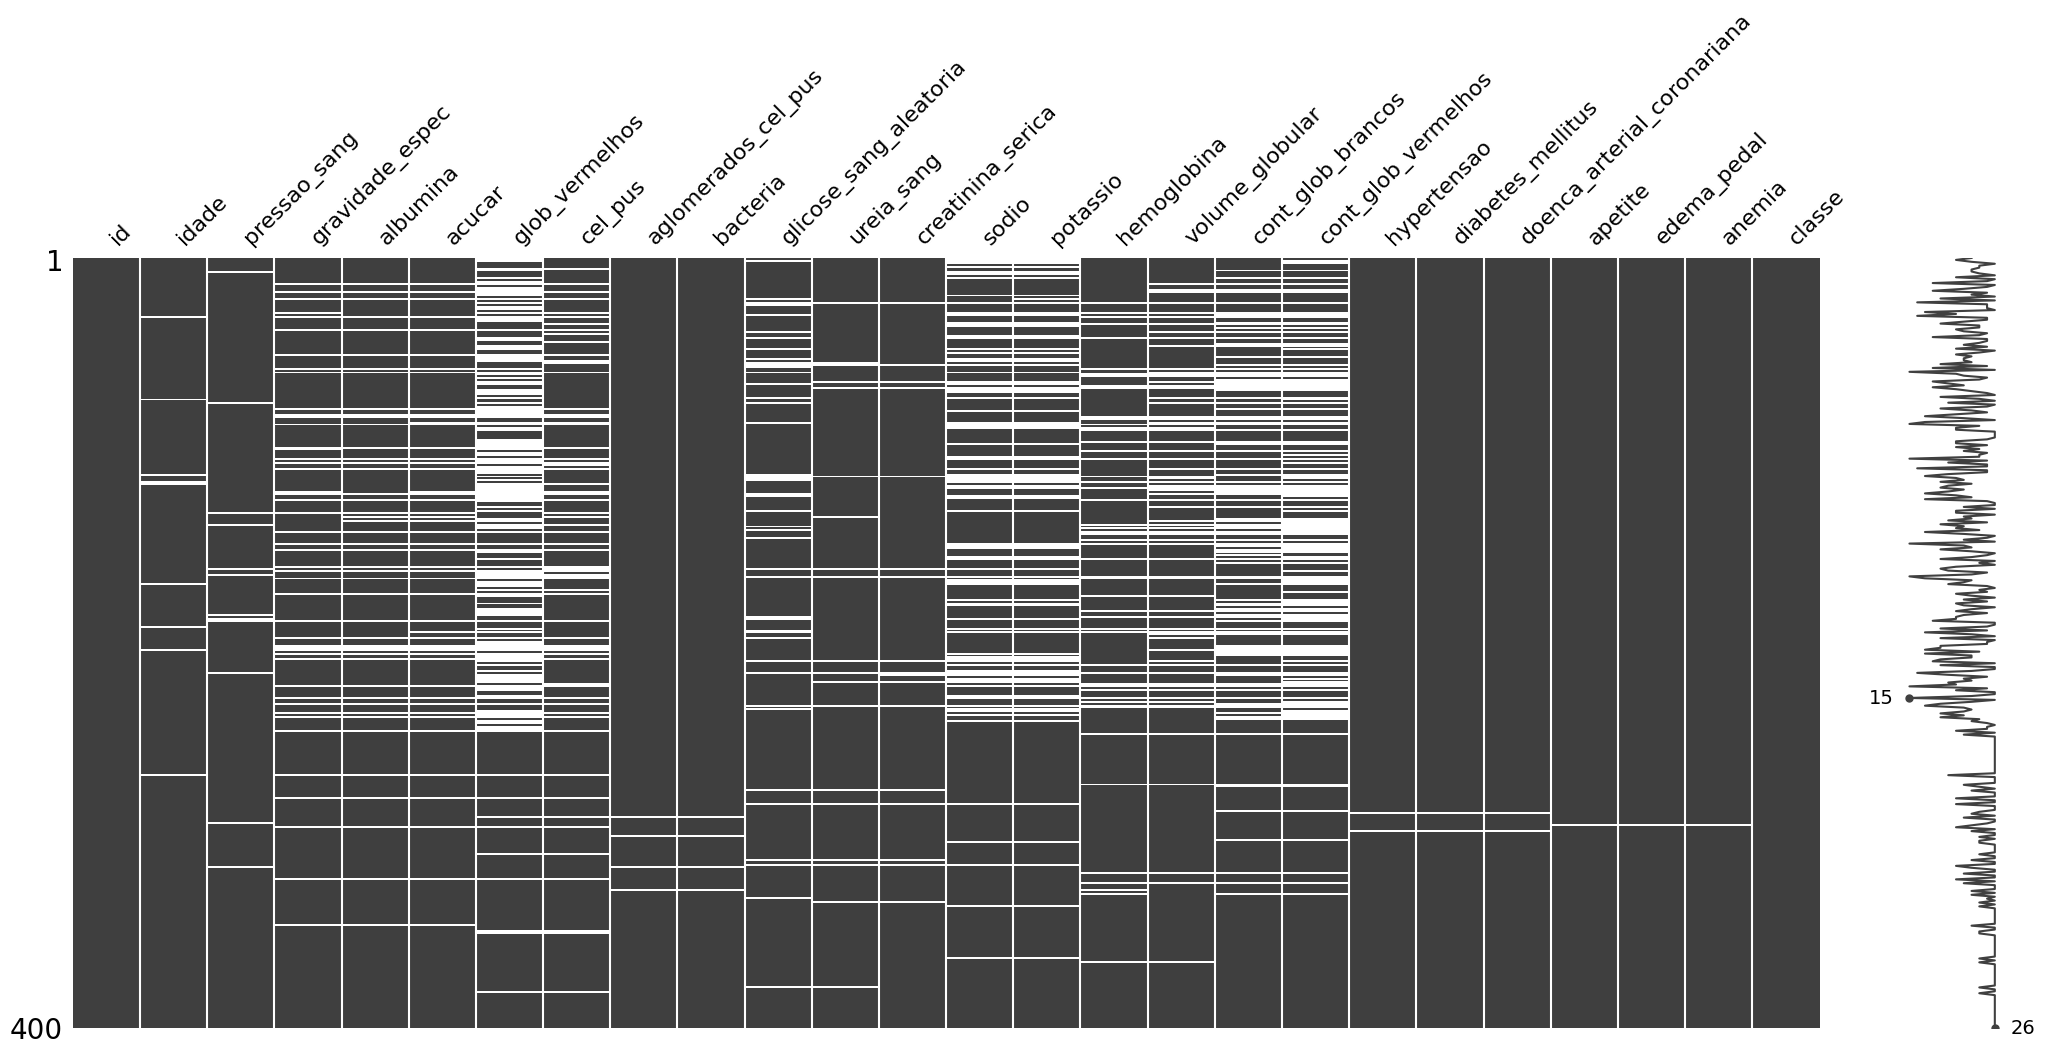

In [369]:
mno.matrix(df_kidney)

Como as colunas hemoglobina, volume_globular, cont_glob_vermelhos e glob_vermelhos têm correlação alta entre elas, optamos por manter apenas a coluna 'hemoglobina' por ser a coluna com menos dados ausentes entre elas

In [370]:
df_kidney = df_kidney.drop(['cont_glob_vermelhos', 'glob_vermelhos', 'volume_globular'], axis = 1)

In [371]:
df_kidney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           400 non-null    int64  
 1   idade                        391 non-null    float64
 2   pressao_sang                 388 non-null    float64
 3   gravidade_espec              353 non-null    float64
 4   albumina                     354 non-null    float64
 5   acucar                       351 non-null    float64
 6   cel_pus                      335 non-null    object 
 7   aglomerados_cel_pus          396 non-null    object 
 8   bacteria                     396 non-null    object 
 9   glicose_sang_aleatoria       356 non-null    float64
 10  ureia_sang                   381 non-null    float64
 11  creatinina_serica            383 non-null    float64
 12  sodio                        313 non-null    float64
 13  potassio            

In [372]:
df_kidney.isnull().sum().sort_values(ascending = False)/len(df_kidney)

cont_glob_brancos              0.2650
potassio                       0.2200
sodio                          0.2175
cel_pus                        0.1625
hemoglobina                    0.1300
acucar                         0.1225
gravidade_espec                0.1175
albumina                       0.1150
glicose_sang_aleatoria         0.1100
ureia_sang                     0.0475
creatinina_serica              0.0425
pressao_sang                   0.0300
idade                          0.0225
bacteria                       0.0100
aglomerados_cel_pus            0.0100
hypertensao                    0.0050
diabetes_mellitus              0.0050
doenca_arterial_coronariana    0.0050
anemia                         0.0025
apetite                        0.0025
edema_pedal                    0.0025
id                             0.0000
classe                         0.0000
dtype: float64

In [373]:
df_plotly = df_kidney.copy()
LE = LabelEncoder()
objList = df_plotly.select_dtypes(include = "object").columns
for obj in objList:
    df_plotly[obj+'_le'] = LE.fit_transform(df_plotly[obj].astype(str))
df_plotly



,id,idade,pressao_sang,gravidade_espec,albumina,acucar,cel_pus,aglomerados_cel_pus,bacteria,glicose_sang_aleatoria,...,cel_pus_le,aglomerados_cel_pus_le,bacteria_le,hypertensao_le,diabetes_mellitus_le,doenca_arterial_coronariana_le,apetite_le,edema_pedal_le,anemia_le,classe_le
0,0,48.0,80.0,1.020,1.0,0.0,normal,notpresent,notpresent,121.0,...,2,1,1,2,2,1,0,1,1,0
1,1,7.0,50.0,1.020,4.0,0.0,normal,notpresent,notpresent,NaN,...,2,1,1,1,1,1,0,1,1,0
2,2,62.0,80.0,1.010,2.0,3.0,normal,notpresent,notpresent,423.0,...,2,1,1,1,2,1,2,1,2,0
3,3,48.0,70.0,1.005,4.0,0.0,abnormal,present,notpresent,117.0,...,0,2,1,2,1,1,2,2,2,0
4,4,51.0,80.0,1.010,2.0,0.0,normal,notpresent,notpresent,106.0,...,2,1,1,1,1,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,notpresent,notpresent,140.0,...,2,1,1,1,1,1,0,1,1,1
396,396,42.0,70.0,1.025,0.0,0.0,normal,notpresent,notpresent,75.0,...,2,1,1,1,1,1,0,1,1,1
397,397,12.0,80.0,1.020,0.0,0.0,normal,notpresent,notpresent,100.0,...,2,1,1,1,1,1,0,1,1,1
398,398,17.0,60.0,1.025,0.0,0.0,normal,notpresent,notpresent,114.0,...,2,1,1,1,1,1,0,1,1,1


In [374]:
fig = px.parallel_coordinates(df_plotly, color_continuous_scale=px.colors.diverging.Tealrose)
fig.show()

Uso do SimpleImputer para tratamento dos dados ausentes, optamos por usar moda para os dados de formato 'object' e média para os dados de formato 'number'

In [375]:
# from sklearn.impute import SimpleImputer
# list_col_cat = df_kidney.select_dtypes(object).columns

# imp_cat = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
# imp_cat = imp_cat.fit(df_kidney[list_col_cat])
# df_kidney[list_col_cat] = imp_cat.transform(df_kidney[list_col_cat])

In [376]:
# list_col_num = df_kidney.select_dtypes(include = np.number).columns

# imp_num = SimpleImputer(missing_values = np.nan, strategy = 'mean')
# imp_num = imp_cat.fit(df_kidney[list_col_num])
# df_kidney[list_col_num] = imp_cat.transform(df_kidney[list_col_num])

In [377]:
df_kidney = df_kidney.dropna(axis = 0)

In [378]:
df_kidney.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 3 to 399
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           193 non-null    int64  
 1   idade                        193 non-null    float64
 2   pressao_sang                 193 non-null    float64
 3   gravidade_espec              193 non-null    float64
 4   albumina                     193 non-null    float64
 5   acucar                       193 non-null    float64
 6   cel_pus                      193 non-null    object 
 7   aglomerados_cel_pus          193 non-null    object 
 8   bacteria                     193 non-null    object 
 9   glicose_sang_aleatoria       193 non-null    float64
 10  ureia_sang                   193 non-null    float64
 11  creatinina_serica            193 non-null    float64
 12  sodio                        193 non-null    float64
 13  potassio            

In [379]:
df_kidney_cat = df_kidney.select_dtypes(object)
for col in df_kidney_cat.columns:
    print(f'Valores da coluna {col}: {df_kidney_cat[col].unique()}\n')

Valores da coluna cel_pus: ['abnormal' 'normal']

Valores da coluna aglomerados_cel_pus: ['present' 'notpresent']

Valores da coluna bacteria: ['notpresent' 'present']

Valores da coluna hypertensao: ['yes' 'no']

Valores da coluna diabetes_mellitus: ['no' 'yes']

Valores da coluna doenca_arterial_coronariana: ['no' 'yes']

Valores da coluna apetite: ['poor' 'good']

Valores da coluna edema_pedal: ['yes' 'no']

Valores da coluna anemia: ['yes' 'no']

Valores da coluna classe: ['ckd' 'notckd']



## Pré processamento de dados

### Definição das features e do target

In [380]:
X = df_kidney.drop(columns=['id', 'classe'])
y = df_kidney['classe']

### Definição da classe

In [381]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)
le.classes_

array(['ckd', 'notckd'], dtype=object)

ckd:0  notckd:1

Verificação do desbalanceamento entre os dados, para essa diferença não é necessário aplicar alguma técnica de balanceamento

Text(0.5, 1.0, 'Distribuição de pessoas do dataset com e sem CKD')

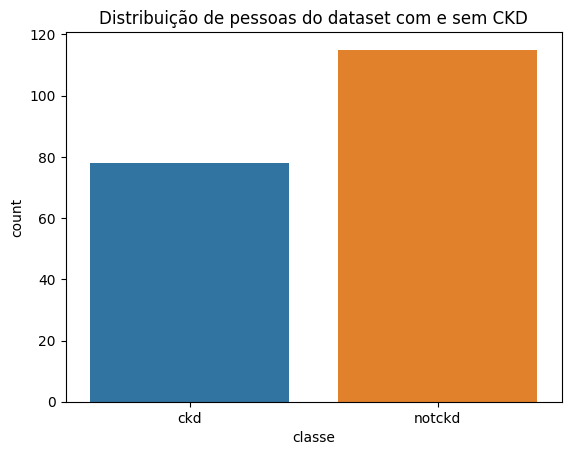

In [382]:
sns.countplot(data = df_kidney, x= 'classe')
plt.title('Distribuição de pessoas do dataset com e sem CKD')

In [383]:
df_kidney.classe.value_counts(normalize = True)

notckd    0.595855
ckd       0.404145
Name: classe, dtype: float64

In [384]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

Listas com os nomes das colunas do tipo 'np.number' e 'obj' 

In [385]:
list_col_objx = X.select_dtypes(object).columns
list_col_numx = X.select_dtypes(include = np.number).columns

### Pipeline do standardization das features np.number e do encoder das features do tipo 'obj'

In [386]:
pipe_num = Pipeline([('scaler', StandardScaler())])

pipe_obj = Pipeline([('obj_encoder', OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value = -1))])

### Split de dados de teste e de treino

In [387]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 42)

In [388]:
from sklearn.linear_model import LogisticRegression

## Árvore de decisão

### Análise das distribuições de dados comparadas ao target

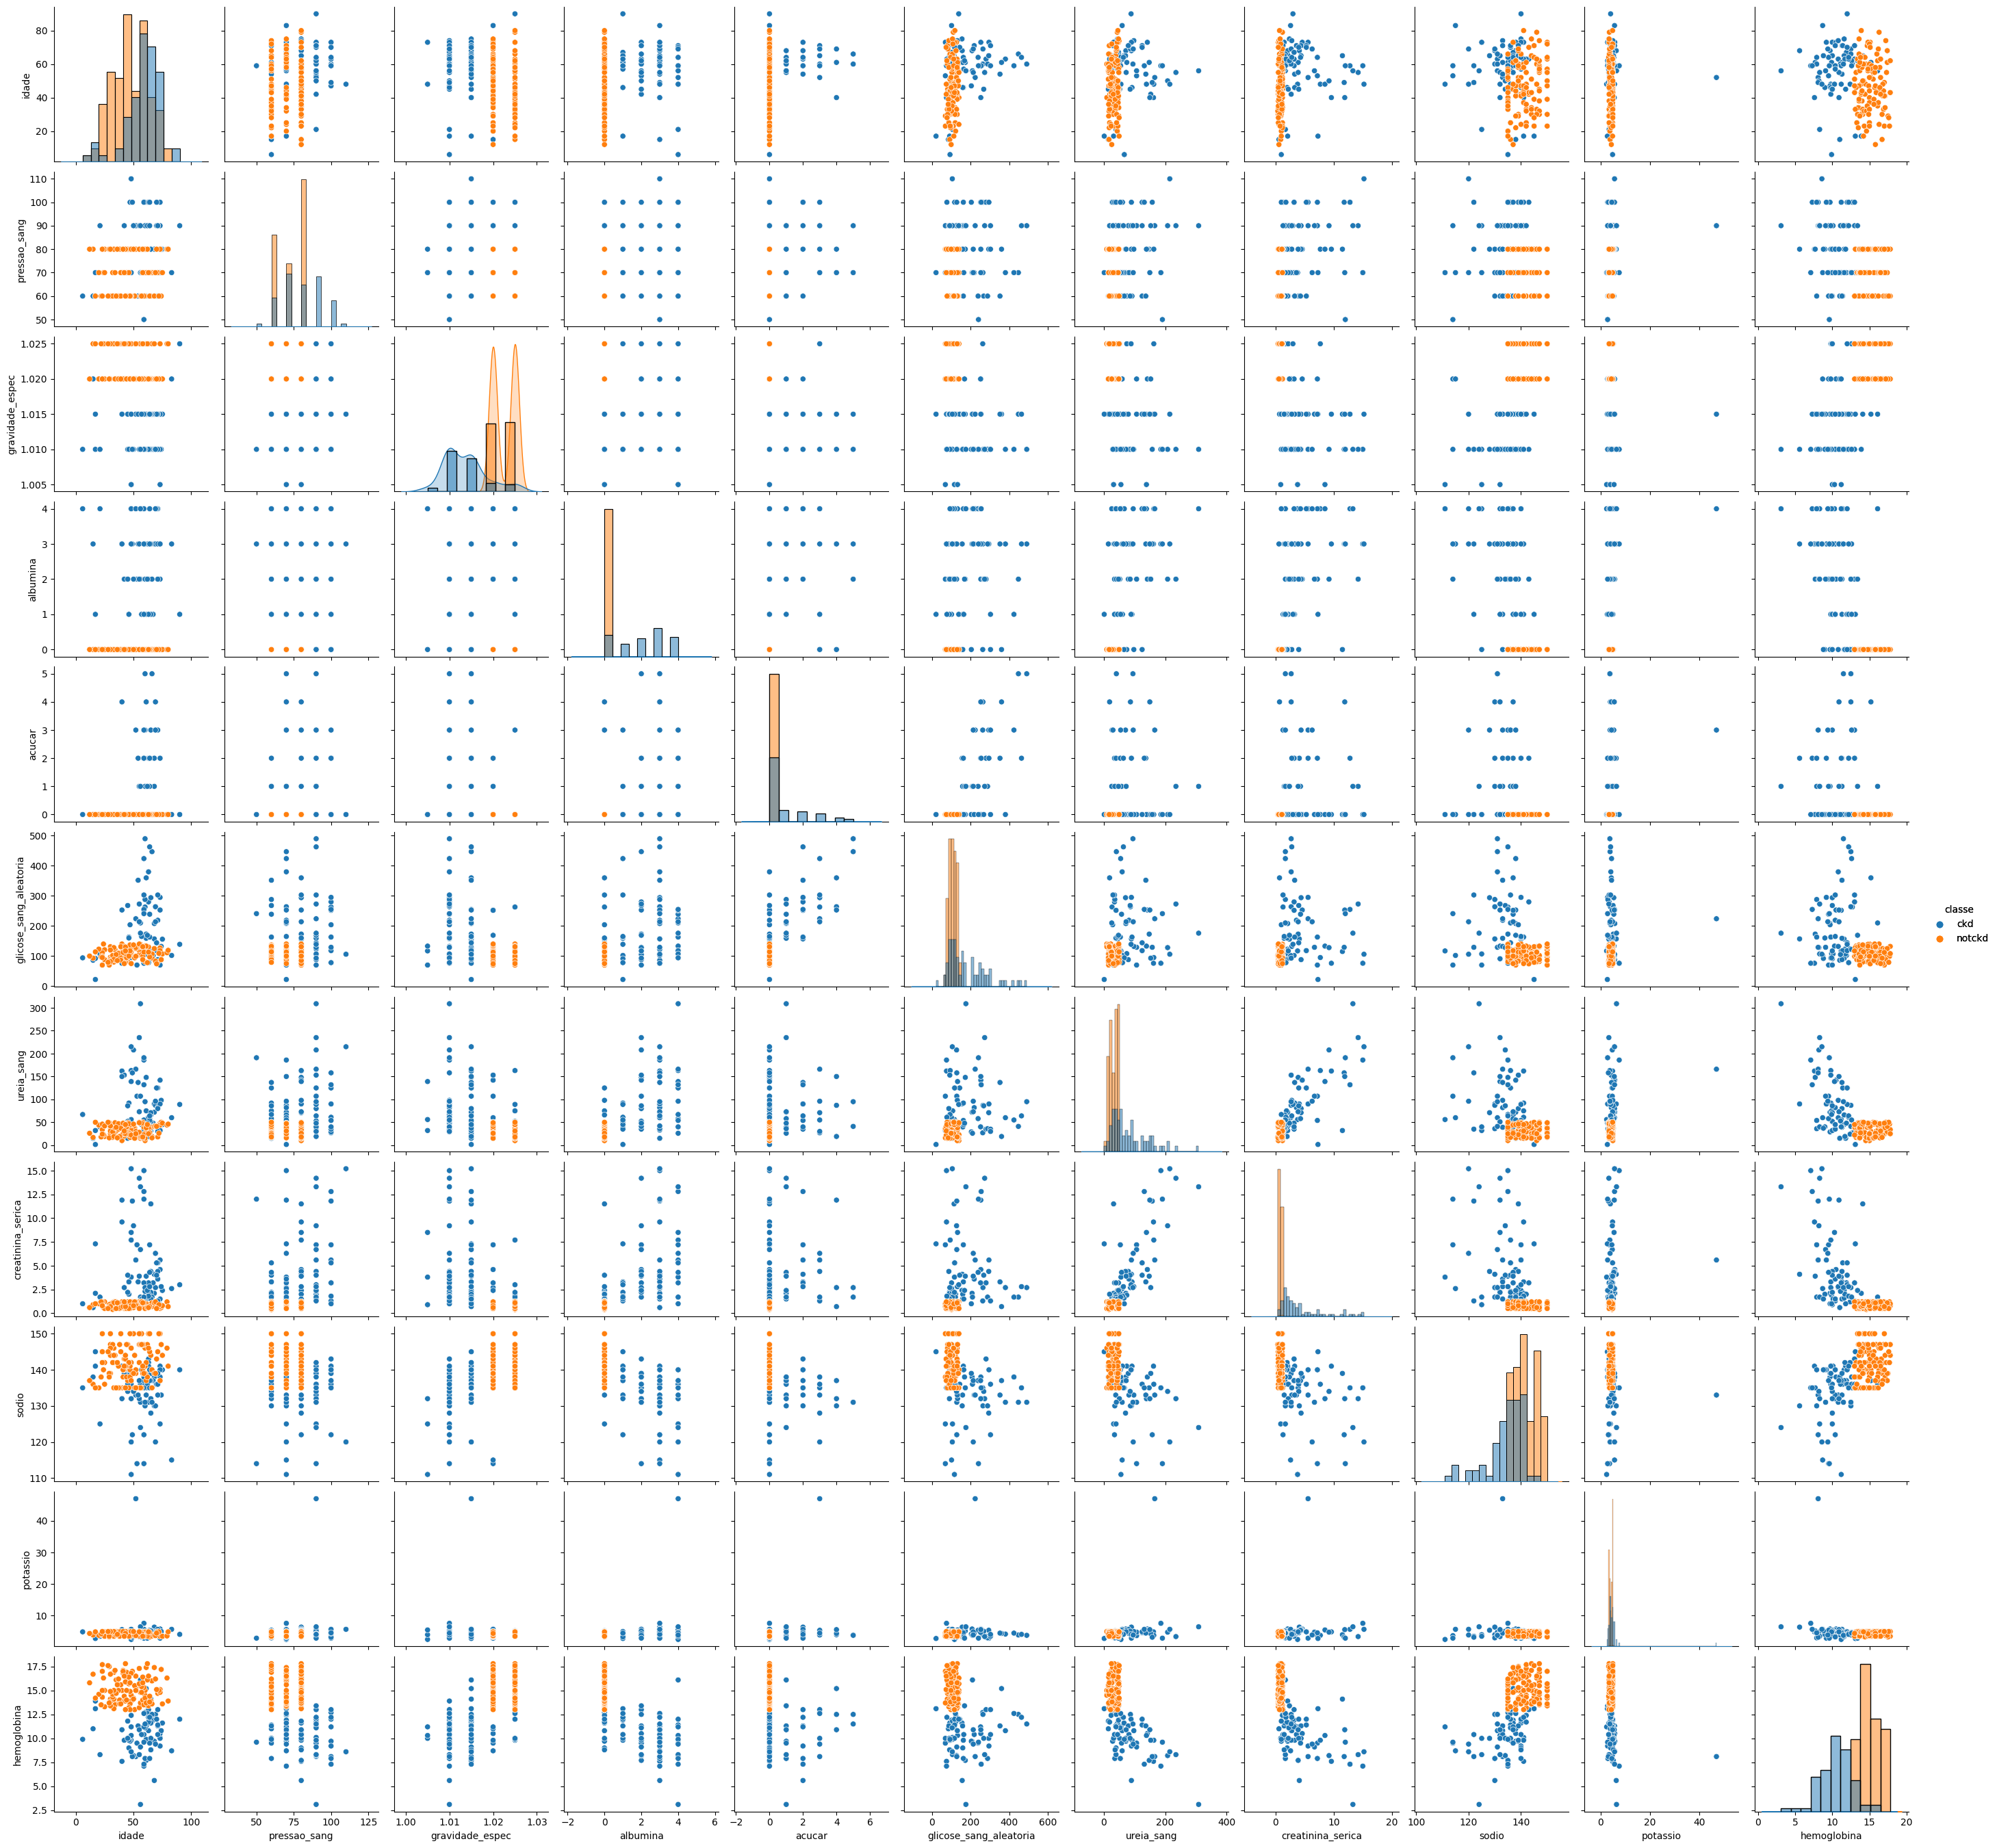

In [389]:
# Pair Plot para ver a relação entre as varáveis
g = sns.pairplot(df_kidney, vars =['idade', 'pressao_sang', 'gravidade_espec', 'albumina', 'acucar', 'glicose_sang_aleatoria', 'ureia_sang', 'creatinina_serica', 'sodio', 'potassio', 'hemoglobina'],hue = 'classe')
g.map_diag(sns.histplot)
g.add_legend()

In [390]:
from sklearn.tree import DecisionTreeClassifier

In [391]:
pre_processing_DT = ColumnTransformer([
    ('transf_obj', pipe_obj, list_col_objx)
])

In [392]:
pipe_tree = Pipeline([
    ('pre_proc_DT', pre_processing_DT),
    ('Tree', DecisionTreeClassifier(criterion = 'gini',
                                     random_state = 42))
      ])
pipe_tree

Pipeline(steps=[('pre_proc_DT',
                 ColumnTransformer(transformers=[('transf_obj',
                                                  Pipeline(steps=[('obj_encoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  Index(['cel_pus', 'aglomerados_cel_pus', 'bacteria', 'hypertensao',
       'diabetes_mellitus', 'doenca_arterial_coronariana', 'apetite',
       'edema_pedal', 'anemia'],
      dtype='object'))])),
                ('Tree', DecisionTreeClassifier(random_state=42))])

### Curva de validação

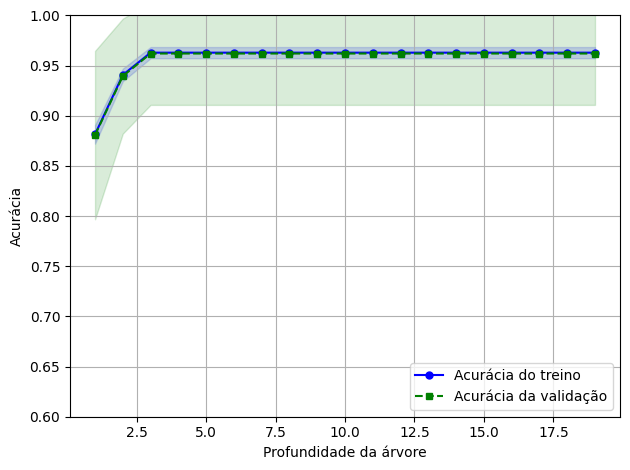

In [393]:
param_range = np.arange(1,20,1).tolist()
train_scores, test_scores = validation_curve(
                estimator=pipe_tree,
                X = X_train,
                y = y_train,
                param_name= 'Tree__max_depth',
                param_range= param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean,
         color='blue', marker='o',
         markersize=5, label='Acurácia do treino')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Acurácia da validação')

plt.fill_between(param_range,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('linear')
plt.legend(loc='lower right')
plt.xlabel('Profundidade da árvore')
plt.ylabel('Acurácia')
plt.ylim([0.6, 1])
plt.tight_layout()
plt.show()

### Curva de aprendizado

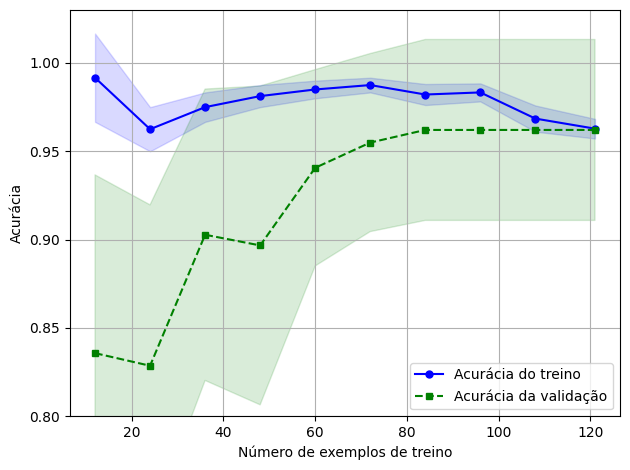

In [394]:
train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_tree,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Acurácia do treino')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Acurácia da validação')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid(visible = True)
plt.xlabel('Número de exemplos de treino')
plt.ylabel('Acurácia')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
plt.show()

### Random Search

In [395]:
param_range_rs = {'Tree__max_depth': range(1,11)}


rs_tree = RandomizedSearchCV( estimator = pipe_tree,
                         param_distributions = param_range_rs,
                         scoring = 'f1',
                         cv = 10,
                         refit = True,
                         n_jobs = -1,
                         random_state = 42,
                         n_iter = 3)
rs_tree = rs_tree.fit(X_train, y_train)
rs_tree.best_score_

0.9712418300653596

In [396]:
rs_tree.cv_results_

{'mean_fit_time': array([0.02003465, 0.01991322, 0.02274261]),
 'std_fit_time': array([0.00233352, 0.00637833, 0.00492863]),
 'mean_score_time': array([0.01386874, 0.01653411, 0.01275041]),
 'std_score_time': array([0.00270962, 0.00519158, 0.00445266]),
 'param_Tree__max_depth': masked_array(data=[9, 2, 6],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'Tree__max_depth': 9},
  {'Tree__max_depth': 2},
  {'Tree__max_depth': 6}],
 'split0_test_score': array([1.        , 0.94117647, 1.        ]),
 'split1_test_score': array([0.94117647, 0.94117647, 0.94117647]),
 'split2_test_score': array([1., 1., 1.]),
 'split3_test_score': array([1., 1., 1.]),
 'split4_test_score': array([1., 1., 1.]),
 'split5_test_score': array([1., 1., 1.]),
 'split6_test_score': array([1.        , 0.94117647, 1.        ]),
 'split7_test_score': array([0.94117647, 0.94117647, 0.94117647]),
 'split8_test_score': array([0.94117647, 0.88888889, 0.94117647]),
 

[Text(0.6, 0.875, 'albumina <= 0.5\ngini = 0.483\nsamples = 135\nvalue = [55, 80]\nclass = l'),
 Text(0.4, 0.625, 'idade <= 0.5\ngini = 0.278\nsamples = 96\nvalue = [16, 80]\nclass = l'),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]\nclass = c'),
 Text(0.6, 0.375, 'acucar <= 0.5\ngini = 0.165\nsamples = 88\nvalue = [8, 80]\nclass = l'),
 Text(0.4, 0.125, 'gini = 0.111\nsamples = 85\nvalue = [5, 80]\nclass = l'),
 Text(0.8, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = c'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 39\nvalue = [39, 0]\nclass = c')]

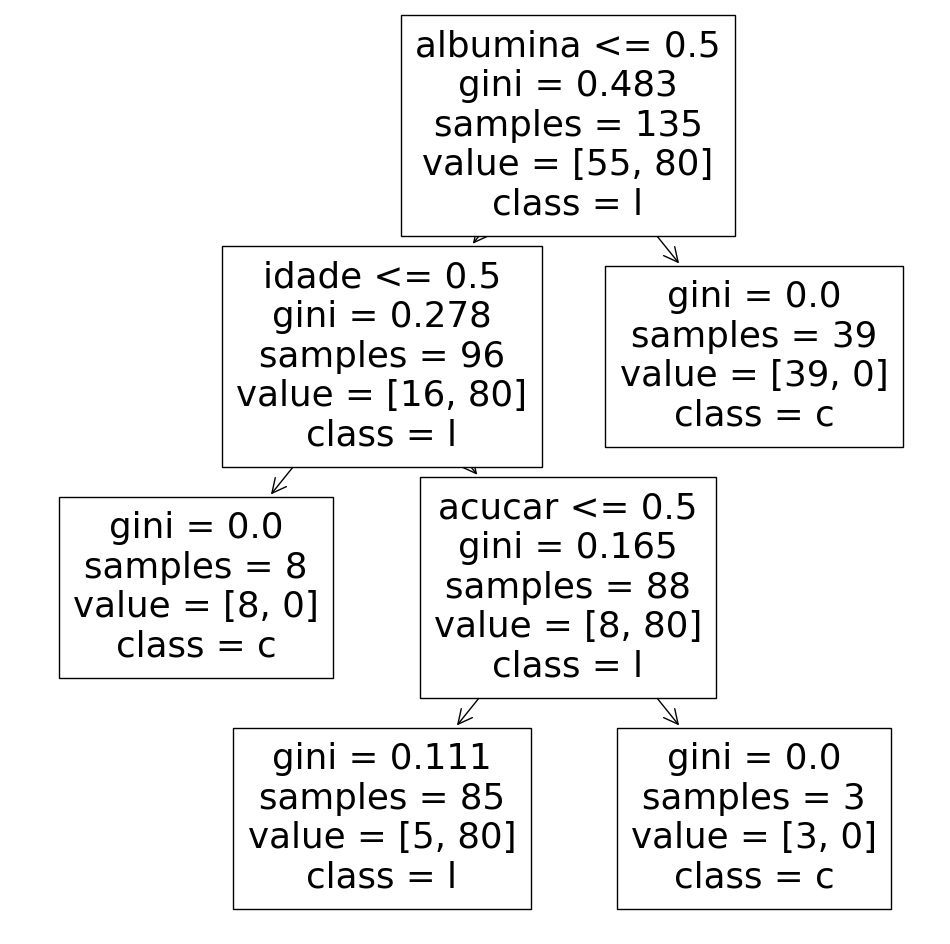

In [397]:
from sklearn import tree

plt.figure(figsize=(12,12))
tree.plot_tree(rs_tree.best_estimator_['Tree'],
               feature_names = X.columns ,
               class_names = 'classe')


In [398]:
y_pred = rs_tree.best_estimator_.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        22
           1       1.00      0.97      0.99        36

    accuracy                           0.98        58
   macro avg       0.98      0.99      0.98        58
weighted avg       0.98      0.98      0.98        58



## Regressão Logística

In [399]:
pre_processing_LR = ColumnTransformer([
    ('transf_num', pipe_num, list_col_numx),
    ('transf_obj', pipe_obj, list_col_objx)
])

Apesar do nome regressão, esse modelo é de classificação

In [400]:
pipe_lr = Pipeline([
    ('pre_proc_LR', pre_processing_LR),
    ('LR', LogisticRegression(penalty = 'l2',
                              random_state = 42,
                              solver = 'lbfgs'))
])
pipe_lr

Pipeline(steps=[('pre_proc_LR',
                 ColumnTransformer(transformers=[('transf_num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['idade', 'pressao_sang', 'gravidade_espec', 'albumina', 'acucar',
       'glicose_sang_aleatoria', 'ureia_sang', 'creatinina_serica', 'sodio',
       'potassio', 'hemoglobina', 'cont_glob_brancos'],
      dtype='object')),
                                                 ('transf_obj',
                                                  Pipeline(steps=[('obj_encoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  Index(['cel_pus', 'aglomerados_cel_pus', 'bacteria', 'hypertensao',
       'diabetes_mellitus', 'doenca_arterial_coronariana', 'apetite',
       'edema_pedal', 'anemia'],
      dtype='object'))])),
                ('LR', LogisticRegression(random_state=42))])

### Curva de validação

In [401]:
from sklearn.metrics import classification_report
from sklearn.model_selection import validation_curve


Nessa curva de validação foi usado cross validation, os dados de treino são divididos em 10, e uma dessas 10 partes é usada para validar o modelo

O parâmetro C altera o 'passo' do modelo, valores mais altos tendem a diminuir o viés e aumentar a variância

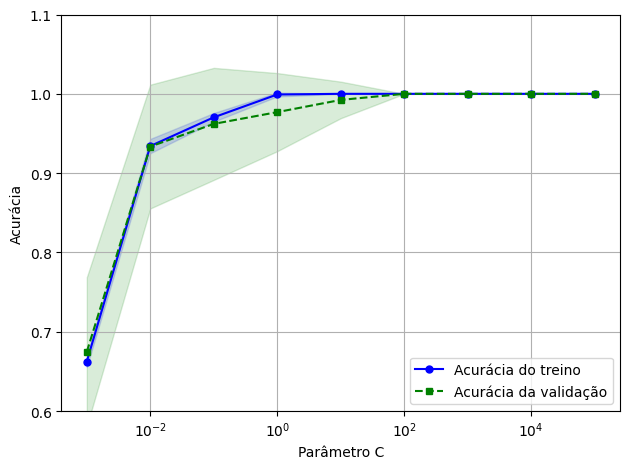

In [402]:
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000, 100000]
train_scores, test_scores = validation_curve(
                estimator=pipe_lr,
                X=X_train,
                y=y_train,
                param_name='LR__C',
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean,
         color='blue', marker='o',
         markersize=5, label='Acurácia do treino')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Acurácia da validação')

plt.fill_between(param_range,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parâmetro C')
plt.ylabel('Acurácia')
plt.ylim([0.6, 1.1])
plt.tight_layout()
plt.show()

### Curva de aprendizado

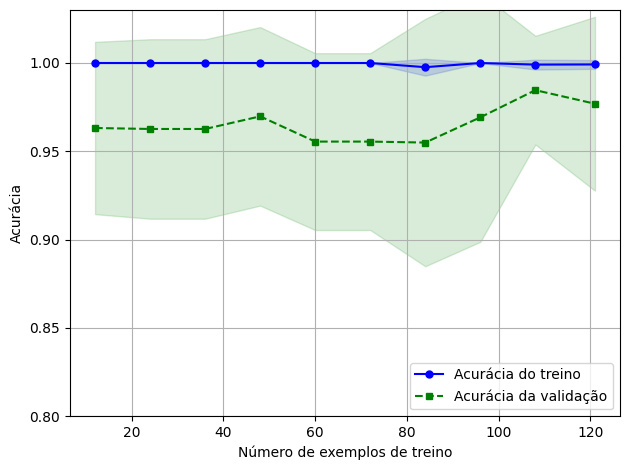

In [403]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_lr,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Acurácia do treino')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Acurácia da validação')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid(visible = True)
plt.xlabel('Número de exemplos de treino')
plt.ylabel('Acurácia')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
plt.show()

### Randomized Search

Random search simples com variação de um parâmetro

In [404]:
from sklearn.model_selection import RandomizedSearchCV

param_range_rs = [{'LR__C':param_range}]

rs = RandomizedSearchCV( estimator = pipe_lr,
                         param_distributions = param_range_rs,
                         scoring = 'f1',
                         cv = 10,
                         refit = True,
                         n_jobs = -1,
                         random_state = 42,
                         n_iter = 6)

rs = rs.fit(X_train, y_train)
rs.best_score_

1.0

In [408]:
rs.cv_results_

{'mean_fit_time': array([0.02719452, 0.02229104, 0.03495655, 0.021995  , 0.02669625,
        0.0224431 ]),
 'std_fit_time': array([0.00374954, 0.00270794, 0.01625104, 0.00318093, 0.00851097,
        0.00685069]),
 'mean_score_time': array([0.01158764, 0.01037679, 0.01506519, 0.01110985, 0.01096299,
        0.00935709]),
 'std_score_time': array([0.00186763, 0.00042761, 0.00728929, 0.00179073, 0.00195578,
        0.00156816]),
 'param_LR__C': masked_array(data=[10000, 0.01, 100.0, 0.001, 100000, 0.1],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'LR__C': 10000},
  {'LR__C': 0.01},
  {'LR__C': 100.0},
  {'LR__C': 0.001},
  {'LR__C': 100000},
  {'LR__C': 0.1}],
 'split0_test_score': array([1.        , 0.88888889, 1.        , 0.76190476, 1.        ,
        1.        ]),
 'split1_test_score': array([1.        , 0.88888889, 1.        , 0.8       , 1.        ,
        1.        ]),
 'split2_test_score': array(

In [405]:
y_pred = rs.best_estimator_.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        35

    accuracy                           1.00        58
   macro avg       1.00      1.00      1.00        58
weighted avg       1.00      1.00      1.00        58



### Grid Search

Grid search simples apenas para fazer uma comparação com o random search

In [406]:
from sklearn.model_selection import GridSearchCV

param_range_gs = [{'LR__C':param_range}]

gs = GridSearchCV(estimator = pipe_lr,
                  param_grid = param_range_gs,
                  scoring = 'f1',
                  cv = 10,
                  refit = True,
                  n_jobs = -1)
gs = gs.fit(X_train, y_train)
gs.best_score_

1.0

In [407]:
y_pred = gs.best_estimator_.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        35

    accuracy                           1.00        58
   macro avg       1.00      1.00      1.00        58
weighted avg       1.00      1.00      1.00        58

